In [1]:
import sys,array
import matplotlib.pyplot as plt
from ROOT import TFile
import root_numpy as rn
import numpy as np

%matplotlib inline

/Library/Python/2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.10.2 is currently installed but you installed root_numpy against numpy 1.8.0rc1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [2]:
#fout = TFile('ana_hist.root')
#t = fout.Get("analysistree/anatree")
#d = t.GetEvent(0)

#Data Beam
f_db ='/Volumes/UBooNEData/mcc8/MiniWorkshop_020617/dataBNB_DDR/full.root' #ana_hist_02a2d31b-c51a-4150-9aa6-e5b703b3b64f.root'
a_db = rn.root2array(f_db,treename='analysistree/anatree',branches=['flsTime_simpleFlashBeam','flsPe_simpleFlashBeam','flsTime_opflashBeam','flsPe_opflashBeam'])

In [3]:
#Data EXT
f_dext ='/Volumes/UBooNEData/mcc8/MiniWorkshop_020617/dataEXT_DDR/full.root'
a_dext = rn.root2array(f_dext,treename='analysistree/anatree',branches=['flsTime_simpleFlashBeam','flsPe_simpleFlashBeam','flsTime_opflashBeam','flsPe_opflashBeam'])

In [4]:
f_db_v = [a_db['flsTime_simpleFlashBeam'][i][j] for i in xrange(a_db.shape[0]) \
       for j in xrange(len(a_db['flsTime_simpleFlashBeam'][i])) ]

opf_db_v = [a_db['flsTime_opflashBeam'][i][j] for i in xrange(a_db.shape[0]) \
       for j in xrange(len(a_db['flsTime_opflashBeam'][i])) ]

f_db_pe_v = [a_db['flsPe_simpleFlashBeam'][i][j] for i in xrange(a_db.shape[0]) \
              for j in xrange(len(a_db['flsPe_simpleFlashBeam'][i])) ]

f_db_cut_v = [a_db['flsTime_simpleFlashBeam'][i][j] for i in xrange(a_db.shape[0]) \
       for j in xrange(len(a_db['flsTime_simpleFlashBeam'][i])) \
           if a_db['flsPe_simpleFlashBeam'][i][j] > 20 ]

n_db_ev = a_db['flsTime_simpleFlashBeam'].shape[0]

In [5]:
#ALSO FOR EXT
f_dext_v = [a_dext['flsTime_simpleFlashBeam'][i][j] for i in xrange(a_dext.shape[0]) \
       for j in xrange(len(a_dext['flsTime_simpleFlashBeam'][i])) ]

opf_dext_v = [a_dext['flsTime_opflashBeam'][i][j] for i in xrange(a_dext.shape[0]) \
       for j in xrange(len(a_dext['flsTime_opflashBeam'][i])) ]

f_dext_pe_v = [a_dext['flsPe_simpleFlashBeam'][i][j] for i in xrange(a_dext.shape[0]) \
              for j in xrange(len(a_dext['flsPe_simpleFlashBeam'][i])) ]

f_dext_cut_v = [a_dext['flsTime_simpleFlashBeam'][i][j] for i in xrange(a_dext.shape[0]) \
       for j in xrange(len(a_dext['flsTime_simpleFlashBeam'][i])) \
           if a_dext['flsPe_simpleFlashBeam'][i][j] > 20 ]

n_dext_ev = a_dext['flsTime_simpleFlashBeam'].shape[0]

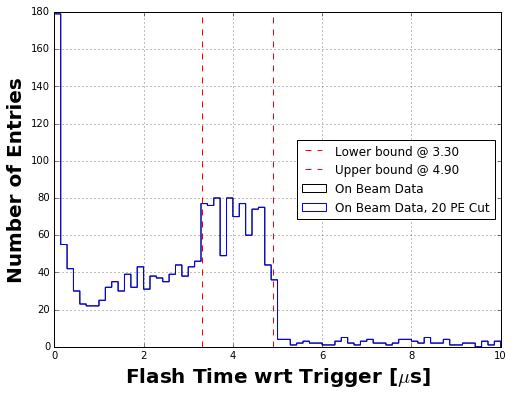

In [18]:
xmin = 3.3
xmax = 4.9

plt.figure(figsize=(8,6))
plt.hist(f_db_v,bins=70,label='On Beam Data',histtype='step',lw=1,color='k',range=[0,10])
#plt.hist(opf_db_v,bins=70,label='Flash Time, BNB Data: OpFlash',histtype='step',lw=1,color='orange',range=[0,10])
plt.hist(f_db_cut_v,bins=70,label='On Beam Data, 20 PE Cut',histtype='step',lw=1,color='b',range=[0,10])
plt.grid(True)
plt.xlabel('Flash Time wrt Trigger [$\mu$s]',fontsize=20,weight='bold')
plt.ylabel('Number of Entries',fontsize=20,weight='bold')
plt.axvline(xmin,color='r',linestyle='--',label='Lower bound @ %.2f' % xmin)
plt.axvline(xmax,color='r',linestyle='--',label='Upper bound @ %.2f' % xmax)
#plt.text(11, 150, '%.0f Events ' % n_db_ev, fontsize=20,verticalalignment='top')
plt.legend(loc='center left', bbox_to_anchor=(.53,0.5))
plt.savefig('FlashPlots/OnBeam.png')


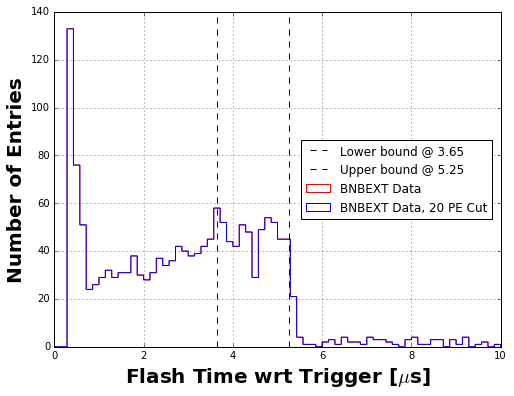

In [17]:
xmin = 3.65
xmax = 5.25

plt.figure(figsize=(8,6))
plt.hist(f_dext_v,bins=70,label='BNBEXT Data',histtype='step',lw=1,color='r',range=[0,10])#filled',alpha=0.4,color='b')
plt.hist(f_dext_cut_v,bins=70,label='BNBEXT Data, 20 PE Cut',histtype='step',lw=1,color='b',range=[0,10])
plt.grid(True)
plt.xlabel('Flash Time wrt Trigger [$\mu$s]',fontsize=20,weight='bold')
plt.ylabel('Number of Entries',fontsize=20,weight='bold')
plt.axvline(xmin,color='k',linestyle='--',label='Lower bound @ %.2f' % xmin)
plt.axvline(xmax,color='k',linestyle='--',label='Upper bound @ %.2f' % xmax)
#plt.text(11, 150, '%.0f Events ' % n_db_ev, fontsize=20,verticalalignment='top')
plt.legend(loc='center left', bbox_to_anchor=(0.54,0.5))
plt.savefig('FlashPlots/OffBeam.png')

In [13]:
PEcut_v = [ x for x in xrange(0,2000,5)]

tot_bnb_flash = len(f_db_pe_v)
tot_ext_flash = len(f_dext_pe_v)

bnb_eff = []
bnb_pe_v = np.array(f_db_pe_v)

cos_eff = []
cos_pe_v = np.array(f_dext_pe_v)

for i in xrange(len(PEcut_v)):

    cut = PEcut_v[i] 
    ndb_left = len(bnb_pe_v[bnb_pe_v > cut])
    bnb_eff.append(float(ndb_left)/tot_bnb_flash)

    ndext_left = len(cos_pe_v[cos_pe_v > cut])
    cos_eff.append(float(ndext_left)/tot_ext_flash)
    

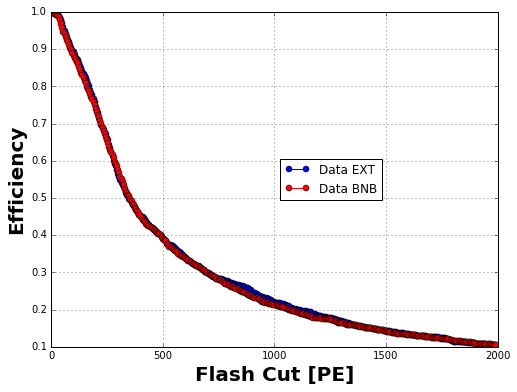

In [14]:
plt.figure(figsize=(8,6))
plt.plot(PEcut_v,cos_eff,label='Data EXT',color='b',marker='o')
plt.plot(PEcut_v,bnb_eff,label='Data BNB',color='r',marker='o')
plt.grid(True)
plt.xlabel('Flash Cut [PE]',fontsize=20,weight='bold')
plt.ylabel('Efficiency',fontsize=20,weight='bold')
#plt.yscale('log')
#plt.xlim(0,150)
#plt.ylim(0.7,1)
plt.legend(loc='center left', bbox_to_anchor=(0.5,0.5))